# Artificial Neural Networks (ANN): Redes Artificiales Neuronales.
* Son clave para los algoritmos mas importantes de ML
* Son necesarias para problemas en clasficacion de imagenes, con respecto a la regresion lineal que necesitaria un almacenamiento de $10^{22}$ floats. Las operacion son muchisimas.

* Son
[universal approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem). Es que "casi" todas las funciones de interes se aproximar tanto como quiera a una red neuronal. Recomiendo
[Nielsen](http://neuralnetworksanddeeplearning.com/) quien explica el teorema de aproximacion el cual fue probado por Cybenko, 1989. Usando funciones de activacion logistic sigmoid $\sigma(x)$. Para los curiosos. Se puede aproximar "cualquier" funcion $f:\mathbb{R}^n \to \mathbb{R}^m$ con una red neuronal de profundidad $d = \max \{ n+1, m \}$.  

* En el curso de ML hablamos de Multilayer Perceptron (MLP), de funciones de activacion, capas, nodos, etc.

## Backpropagation. Propagacion hacia atras.
La funcion de costo la podemos escribir como

$$C(\Theta) = \frac1m \sum_{i=1}^m C_i(\Theta) $$

Es suficiente hallar el gradiente para cada una de las componentes de esta suma y luego se suman los gradientes "locales". Es decir. El **tensor** $\Theta$ es de rango 3.
$\theta_{kj}^{\ell}$, donde $kj$ indica la union entre el nodo $j$ y el nodo $k$ de las capas $\ell-1$ y $\ell$.

Las componentes del gradiente son

$$\frac{\partial C_i(\Theta)}{\partial \theta_{kj}^{\ell}} $$
Esta expresion es de rango 4. Pero el $i$ no es muy importante. En todas partes apareceria $C_i$ y no es necesario entonces lo vamos a cambiar por $C$. Lo que buscamos es entonces

$$\frac{\partial C(\Theta)}{\partial \theta_{kj}^{\ell}} $$

Mas elementos: Recuerden que de ML en capa calculamos la parte lineal como $z_i = \Theta^T a$.  Y luego se aplica la activacion  a cada $z$.






Como $z_i$ es una variable intermedia vamos a usar la regla de la cadena. $z_i = funcion_lineal(\theta_{kj}^\ell)$

$$ \frac{\partial C}{\partial \theta_{kj}^{\ell}} = \frac{\partial C}{\partial z_j^{\ell}} \frac{\partial z_j^{\ell}}{\partial  \theta_{kj}^{\ell}} \quad ,\quad j,k \quad \text{fijos}. \tag{1} $$

El objetivo es evaluar esta ecuacion. Primero evaluamos la segunda parte.

Recuerden que la funcion $z_j^{\ell}$ es lineal y la formula es

$$z_j^\ell = \sum_p a_p^{\ell-1} \theta_{pj}^{\ell} $$

$$\frac{\partial z_j^\ell}{\partial \theta_{kj}^{\ell}}
= \sum_p \frac{\partial \theta_{pj}^{\ell}}{\partial \theta_{kj}^{\ell}}  a_p^{\ell - 1} = \sum_p \delta_{pk}  a_p^{\ell-1} = a_k^{\ell-1}$$

Tenemos entonces reescribimos la ecuacion (1)

$$\frac{\partial C}{\partial \theta_{kj}^\ell} = \frac{\partial C}{\partial z_j^\ell} a_k^{\ell-1} $$


En este momento nos preocupa la derivada parcial

$$d_j^{\ell} = \frac{\partial C}{\partial z_j^{\ell}}  $$

Comenzamos por el final, la capa $L$.
$$C(\Theta) = C(a^L(z^L))$$.

Usando la regla de la cadena, de nuevo aca
$$d_j^L = \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L}  $$
La activacion es una funcion (por ejemplo la sigmoid logistica) que la llamamos simplemente $f$. Podemos escribir esta ecuacion como

$$d_j^L = \frac{\partial C}{\partial a_j^L} f'(z_j^L) $$

Esta ecuacion la puede escribir en forma matricial (vectorial ) como

$$d^L = \nabla_{a^L} C \circ f'(z^L) $$

Como propagar el gradiente a las capas anteriores. Digmos que queremos evaluar $d_j^\ell$ en una capa arbitraria $\ell$ como funcion de recursiva? La idea es que

$$z_j^{\ell+1} = g(z_1^\ell, z_2^\ell, \cdots, z_n^\ell) $$
asumiendo $n$ nodos en la capa $\ell$.

\begin{eqnarray}
d_j^\ell &=& \frac{\partial C}{\partial z_j^\ell} \\
&=& \sum_k \frac{\partial C}{\partial z_k^{\ell+1}} \frac{\partial z^{\ell +1}}{\partial z_j^{\ell}} \\
&=& \sum_k d_k^{\ell + 1}  \frac{\partial z_k^{\ell+1}}{\partial z_j^\ell} \tag{2}
\end{eqnarray}

Ahora veamos explicitamente como $z_k^{\ell+1}$ se relaciona con $\theta_{pi}^{\ell +1}$.

$$z_k^{\ell+1} = \sum_p a_p^{\ell} \theta_{pk}^{\ell+1} = \sum_p \theta_{pk}^{\ell +1}  f(z_p^\ell)$$

Sacamos la derivada de esta expresion.  

$$\frac{\partial z_k^{\ell + 1}}{\partial z_j^\ell} = \sum_p \theta_{pk}^{\ell + 1} f'(z_p^\ell) \frac{\partial z_p^\ell}{\partial z_j^\ell} =  \sum_p \theta_{pk}^{\ell + 1} f'(z_p^\ell) \delta_{pj} = \theta_{j k}^{\ell +1} f'(z_j^\ell)$$
Insertamos este valor en  (2)

$$d_j^\ell = \sum_k d_k^{\ell+1} \theta_{jk}^{\ell+1} f'(z_j^\ell) $$

Esta ecuacion la podemos escribir en foma vectorizada como

$$d^\ell = \Theta^{\ell +1} d^{\ell+1} \circ f'(z^\ell)  $$

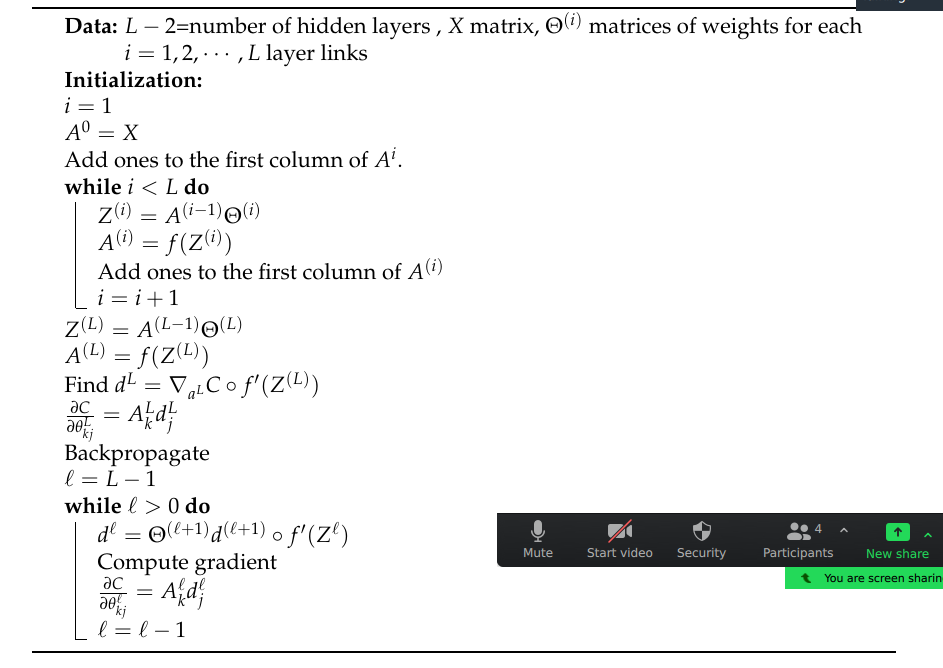

# Desarrollo de un modelo
Los puntos importantes a tratar son

* consecusion de datos (adquision de datos)
* pre-procesamiento de datos
* construccion de la arquitectura
* Entrenamiento y pruebas en los datos
* hacer predicciones con los datos.

## Consecusion de datos
Voy a agrgar una cantidad de enlaces muy importantes.
La red (internet) esta inundada de datos.

* [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research) muestra una base de datos para investigacion ML. Bastante amplia.

* [paperswithcode.com](https://paperswithcode.com/datasets) contiene 11631 conjuntos de datos de distintos tipos.

* [Imagenet](https://image-net.org/) tiene mas de 14 millones de imagenes.

* [Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html). Contiene 102 categorias de flores.

* [Cifar 10 Cifar 100](https://www.cs.toronto.edu/~kriz/cifar.html) son imagenes pequenhas para entrenar sistemas. Lo usa Stanford en su clase de CNN. El cifar 100 usa 100 clases.

* [Huggin Face](https://huggingface.co/?utm_source=chatgpt.com).
Es un laboratorio de AI con muchos datos y pesos ya precalculados de modelos de LLM u otros.

* [Unplash](https://unsplash.com/photos/a-close-up-of-a-fish-in-a-body-of-water-XCprxxeAcpE)
Es un repositorio de millones de fotos sin necesidad de problemas de derechos de autor.

* [know your data](https://knowyourdata.withgoogle.com/) mas de 70 conjuntos de datos conectados con TensorFlow.

* Muchas mas. Ver las notas de clase.

La internet esta llena de datos. Videos, los que quiera, imagenes las que quiera.


Ojo. Muchos datos no estan disponibles en internet. Ejemplo, tengo dos estudiantes de doctorado que toman los datos en un laboratorio de NeuroCiencias con estudiantes de bachillerato de Medellin usando un software
[Facereader](https://www.daon.com/products/xface/?utm_term=face%20recognition&utm_campaign=FY22_LATAM_All_Search&utm_source=adwords&utm_medium=ppc&hsa_acc=2948232160&hsa_cam=19897607474&hsa_grp=174649059774&hsa_ad=736542275265&hsa_src=g&hsa_tgt=kwd-10717012&hsa_kw=face%20recognition&hsa_mt=b&hsa_net=adwords&hsa_ver=3&gad_source=1&gclid=Cj0KCQjw-e6-BhDmARIsAOxxlxUcRymzll1aRCRyz-vrEZxka6zL2odPQ1arsZvEpHwkCOcXzO99zFIaAoKIEALw_wcB). Estos datos no se consiguen en la internet.


## Preprocesamiento
* Homogenizacion: Por ejemplo algunas imagenes son de $200 \times 300$ pixeles y otras de $100 \times 100$. Llevarlas todas a un formato uniforme de $150 \times 150$.

* Normalizacion: Ya vimos en ML "feature normalizacion". Es muy util para que los sistemas sean mas estables.

* Eliminacion de ruido (incluidos NaN, NONE)

* Formateo. Para que todos los datos queden en el mismo formato. Se puede usar PANDAS.

* Otros.

## Construccion de la arquitectura.
Este es de los pasos mas dificiles y fundamentales.
Por ejemplo si es una red neuronal, cuantas capas? cuantos nodos por capa? que funciones de activacion? etc. Si es un arbol de decision: cuantas ramas?  Aca es donde se definine los hiperparametros. Parametros son los $\theta$. Lo demas se llaman hiperametros: numero de capas, numero de nodos por capa, ADAM, ADGRAD, RMSprop, el $\eta$, $\beta$. Todo esto aplica al tipo de conexion entre capas. Pero hay otras arquitecturas (que vamos a ver).

En redes neuronales:
* Densas (MLP). Todos-con-todos (entre capas consecutivas).
* Convolutional Neural Networks (CNN)
* Recurrent Neural Networks (RNN)
* Generarative Adversarial Networks (GANs).

Hay una aplicacion hecha con `TensoFlow`. Se llama
[playground](https://playground.tensorflow.org/#activation=tanh&batchSize=13&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2&seed=0.39311&showTestData=false&discretize=false&percTrainData=60&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) es un laboratorio para entender el concepto de **arquitectura** y sus **hiperparametros**.

## Entrenamiento del modelo.
Una vez se definan los parametros de "gradient accelerator", "batch size" y otros toca segmentar los datos en "entrenamiento y prueba" (70% y 30%). Toca verificar cosas como la matriz de confusion, la precision, accuracy, F1 score, ROC/AUC.

## Make predictions.
Hacer las predicciones con los $\theta$s obtenidos.


Todo este proceso puede ir en un ciclo, donde incluso, se pueden tomar datos nuevos y redisenhar la arquitectura.....

Hasta cuando?
Hasta que la precision se aceptable (por decir algo $90%$)
y no halla **overfitting**.

# Proxima Clase: Deep Learning:
    * CNN
    * RNN
    * LSTM
    * etc.